In [1]:
import pandas as pd

In [2]:
df_repo = pd.read_csv('commits_all.csv',
                     dtype={'commit':str, 'author.name':str, 'author.email':str, 'reported-by':str, 
                            'reviewed-by':str, 'acked-by':str, 'tested-by':str, 'signoffs':str, 
                            'added':int, 'removed':int, 'files':str})

# Transform dates into monthly periods
df_repo['date'] = pd.to_datetime(df_repo['date'])\
                                .dt.to_period('M')\
                                .map(lambda x: x.to_timestamp())

df_repo.head()

,commit,date,author.name,author.email,reported-by,reviewed-by,acked-by,tested-by,signoffs,added,removed,files
0,bbf5c979011a099af5dc76498918ed7df445635b,2020-10-01,Linus Torvalds,torvalds@linux-foundation.org,NaN,NaN,NaN,NaN,NaN,0,0,NaN
1,3dd0130f2430decf0cb001b452824515436986d2,2020-10-01,Linus Torvalds,torvalds@linux-foundation.org,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2,5b697f86f9f136d200c9827d6eca0437b7eb96cf,2020-10-01,Linus Torvalds,torvalds@linux-foundation.org,NaN,NaN,NaN,NaN,NaN,0,0,NaN
3,c120ec12e216225f7536cc1b924fe428ff64b5bd,2020-10-01,Linus Torvalds,torvalds@linux-foundation.org,NaN,NaN,NaN,NaN,NaN,0,0,NaN
4,aa5c3a2911e6d5feaf0c3c7af5bbc652f129d8b2,2020-10-01,Linus Torvalds,torvalds@linux-foundation.org,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [3]:
authors = df_repo.groupby('author.name').nunique()['commit'].sort_values().reset_index()

one_time_authors = pd.merge(authors[authors['commit'] == 1].drop('commit', axis=1), df_repo, on='author.name', how='left')


In [4]:
one_time_authors.groupby('author.name').nunique()['commit'].sort_values()\
.reset_index()

,author.name,commit
0,?,1
1,Peter Gundermann,1
2,Peter Gsellmann,1
3,Peter Gonda,1
4,Peter Fritzsche,1
...,...,...
7103,Hiro Sugawara,1
7104,Hindin Joseph,1
7105,Himanshu Maithani,1
7106,Hoang Le,1


In [5]:
cols = list(one_time_authors.columns)
cols.remove('files')
files = one_time_authors.set_index(cols)

files['files'] = files['files'].fillna('').map(lambda x: x.split(','))

files = pd.melt(files['files'].apply(pd.Series).reset_index(), 
            id_vars=cols,
            value_name='files').reset_index()

files.drop('variable', axis=1, inplace=True)

<AxesSubplot:ylabel='files'>

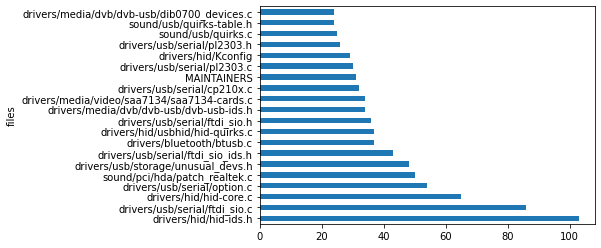

In [6]:
files.groupby('files').nunique()['commit'].sort_values(ascending=False)[:20]\
.plot.barh()

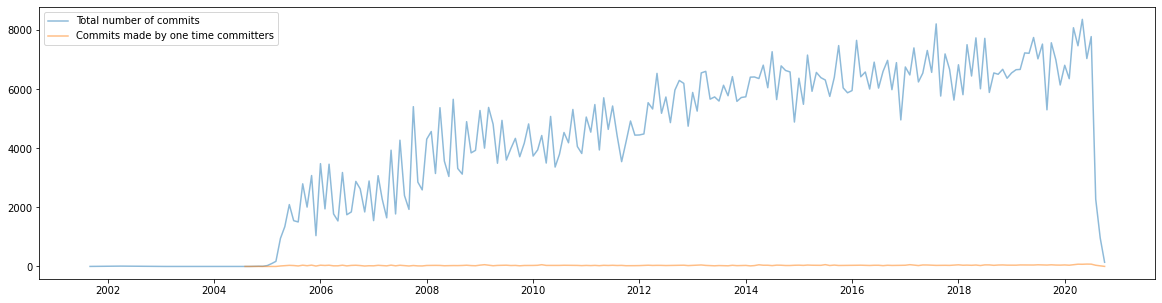

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

# Plot total number of commits
mask = (df_repo['date'] > '2000-01-01') & (df_repo['date'] <= '2021-01-01')
ax.plot(df_repo.loc[mask].groupby('date').count().reset_index()['date'],
        df_repo.loc[mask].groupby('date').count().reset_index()['commit'],
        alpha=0.5)

# Plot the number of commits made by one time committers#
mask = (one_time_authors['date'] > '2000-01-01') & (one_time_authors['date'] <= '2021-01-01')
ax.plot(one_time_authors.loc[mask].groupby('date').count().reset_index()['date'],
        one_time_authors.loc[mask].groupby('date').count().reset_index()['commit'],
        alpha=0.5)

ax.legend(['Total number of commits', 'Commits made by one time committers'])

ax.figure.savefig('total_vs_one_timer_by_time.pdf', bbox_inches = "tight")

<AxesSubplot:xlabel='date'>

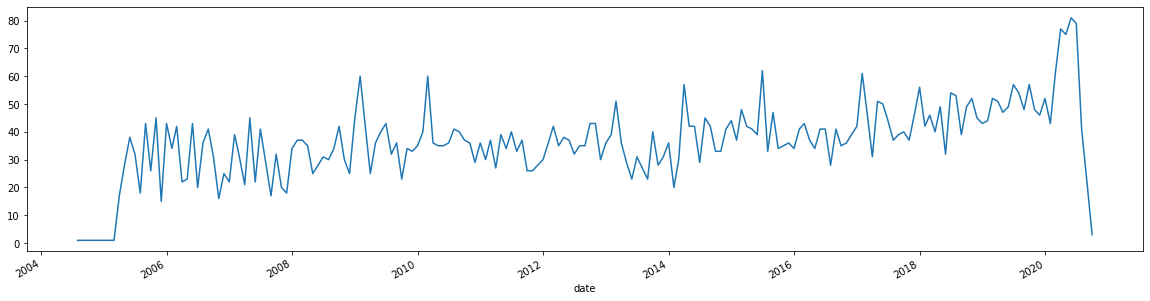

In [8]:
one_time_authors.groupby('date').nunique()['commit'].plot.line(figsize=(20, 5))

In [9]:
cols = list(one_time_authors.columns)
cols.remove('reviewed-by')
reviewers = one_time_authors.set_index(cols)

reviewers['reviewed-by'] = reviewers['reviewed-by'].fillna('').map(lambda x: x.split(','))

reviewers = pd.melt(reviewers['reviewed-by'].apply(pd.Series).reset_index(), 
            id_vars=cols,
            value_name='reviewed-by').reset_index()

reviewers.drop('variable', axis=1, inplace=True)

<AxesSubplot:ylabel='reviewed-by'>

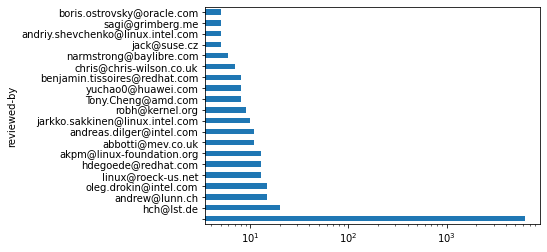

In [10]:
reviewers.groupby('reviewed-by').nunique()['commit'].sort_values(ascending=False)[:20]\
.plot.barh(logx=True)